In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

In [2]:
mnist_train = pd.read_csv('../../kaggle_compatition_1/train.csv')
mnist_test = pd.read_csv('../../kaggle_compatition_1/test.csv')
mnist_train_labels = pd.read_csv('../../kaggle_compatition_1/train_result.csv')

In [3]:
print(mnist_train.shape, mnist_test.shape)

(50000, 1569) (10000, 1569)


In [9]:
mnist_train.drop(columns="Unnamed: 1568", axis=1, inplace=True)
mnist_test.drop(columns="Unnamed: 1568", axis=1, inplace=True)

In [4]:
mnist_train.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.422656e-04,1.289844e-04,4.507813e-05,3.500000e-05,4.843750e-06,4.073494e-21,-2.286773e-21,-4.611464e-22,-8.868345e-23,NaN
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.561729e-02,9.351047e-03,5.305435e-03,5.115538e-03,1.083095e-03,7.799532e-19,2.411055e-19,3.859540e-20,8.780146e-21,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.079193e-16,-6.612630e-17,-3.874247e-17,-4.171438e-17,-3.843456e-17,-3.560401e-17,-2.852720e-17,-5.484856e-18,-1.425461e-18,NaN
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.008095e-21,-1.911413e-21,-4.709699e-22,-1.216053e-22,-2.819378e-23,-6.457080e-24,-1.694220e-24,-4.922435e-25,-1.301832e-25,NaN
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.712667e-24,1.413935e-25,1.519447e-26,-8.717905e-27,-2.206525e-28,7.383244e-28,6.269819e-29,7.271217e-30,1.040227e-30,NaN
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.032100e-20,2.213688e-21,5.497079e-22,1.152767e-22,2.907467e-23,7.300542e-24,1.756187e-24,4.853708e-25,1.445402e-25,NaN
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.921875e-01,9.882812e-01,9.882812e-01,9.531250e-01,2.421875e-01,6.236504e-17,2.088247e-17,1.989290e-18,2.665442e-19,NaN


In [10]:
mnist_train.isna().any().any()

False

IMAGE LABEL: 4


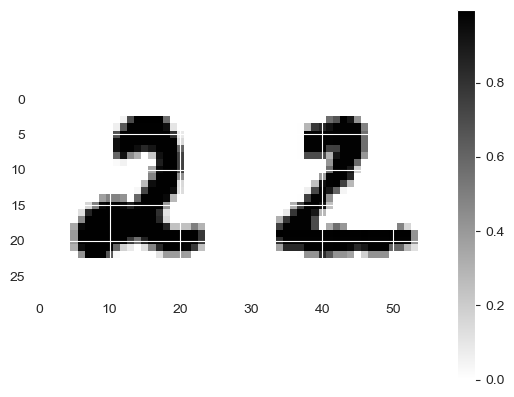

In [13]:
digit_array = mnist_train.loc[3, "Feature 1":]
arr = np.array(digit_array)

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,56))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train_labels.loc[3, "Class"]))

In [14]:
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(mnist_train)
standardized_data.shape

(50000, 1568)

In [15]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(1568, 1568)

In [19]:
from scipy.linalg import eigh

lambdas, vectors = eigh(cov_matrix, eigvals=(1566, 1567))
vectors.shape

(1568, 2)

In [20]:
vectors = vectors.T
vectors.shape

(2, 1568)

In [23]:
new_coordinates = np.matmul(vectors, standardized_data.T)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, mnist_train_labels['Class'])).T

(2, 50000)


In [24]:
df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()

,f1,f2,labels
0,-4.271683,9.154192,5.0
1,-7.357127,-1.756076,4.0
2,-0.471312,5.090494,5.0
3,1.141982,10.022976,4.0
4,5.602787,-5.509460,4.0


In [25]:
sns.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

In [26]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(50000, 2)

In [29]:
pca_data = np.vstack((pca_data.T, mnist_train_labels['Class'])).T

In [30]:
df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_PCA.head()

,f1,f2,labels
0,-4.271683,9.154192,5.0
1,-7.357127,-1.756076,4.0
2,-0.471312,5.090494,5.0
3,1.141982,10.022976,4.0
4,5.602787,-5.509460,4.0


In [31]:
pca.n_components = 1568
pca_data = pca.fit_transform(standardized_data)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_variance_retained = np.cumsum(percent_variance_retained)

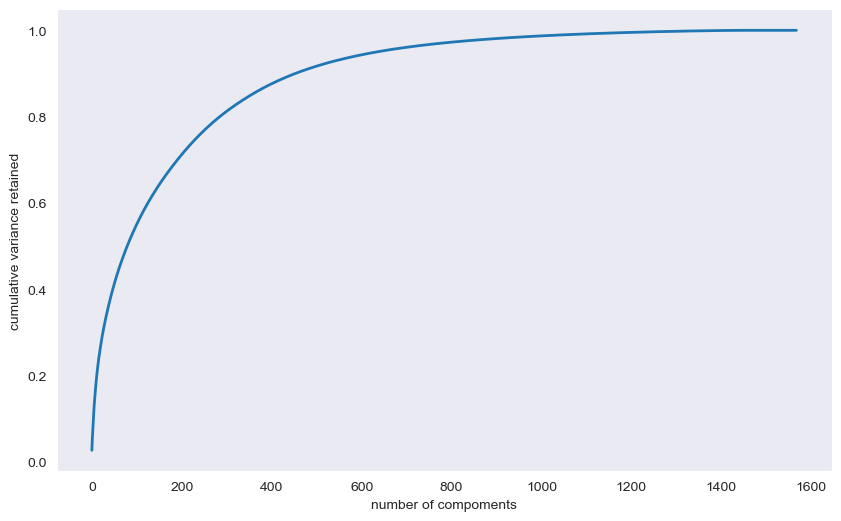

In [32]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cum_variance_retained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("number of compoments")
plt.ylabel("cumulative variance retained")
plt.savefig("pca_cumulative_variance.png")
plt.show()

In [36]:
mnist_train_data = np.array(mnist_train)
mnist_train_label = np.array(mnist_train_labels['Class'])

In [37]:
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 56, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(50000, 28, 56, 1) (50000,)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [39]:
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", mnist_train_label.shape)

Shape of ytrain after encoding:  (50000, 19)


In [41]:
def build_model(input_shape=(28, 56, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(19, activation='softmax'))
    return model


def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history

In [42]:
cnn_model = build_model((28, 56, 1))
compile_model(cnn_model, 'adam', 'categorical_crossentropy')

# train the model for as many epochs as you want but I found training it above 80 will not help us and eventually increase overfitting.
model_history = train_model(cnn_model, mnist_train_data, mnist_train_label, 80, 0.2)

2022-10-30 12:47:47.475381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/80
1250/1250 [==============================] - 59s 47ms/step - loss: 2.2354 - accuracy: 0.2549 - val_loss: 1.2498 - val_accuracy: 0.5541
Epoch 2/80
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9009 - accuracy: 0.6946 - val_loss: 0.3494 - val_accuracy: 0.9045
Epoch 3/80
1250/1250 [==============================] - 59s 47ms/step - loss: 0.3994 - accuracy: 0.8783 - val_loss: 0.1771 - val_accuracy: 0.9508
Epoch 4/80
1250/1250 [==============================] - 59s 47ms/step - loss: 0.2867 - accuracy: 0.9152 - val_loss: 0.1612 - val_accuracy: 0.9560
Epoch 5/80
1250/1250 [==============================] - 58s 47ms/step - loss: 0.2245 - accuracy: 0.9344 - val_loss: 0.1197 - val_accuracy: 0.9648
Epoch 6/80
1250/1250 [==============================] - 59s 47ms/step - loss: 0.1930 - accuracy: 0.9440 - val_loss: 0.1071 - val_accuracy: 0.9703
Epoch 7/80
1250/1250 [==============================] - 59s 47ms/step - loss: 0.1695 - accuracy: 0.9500 - val_loss: 0.0863 -

In [43]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()
    plt.savefig(str(metric + '_plot.png'))

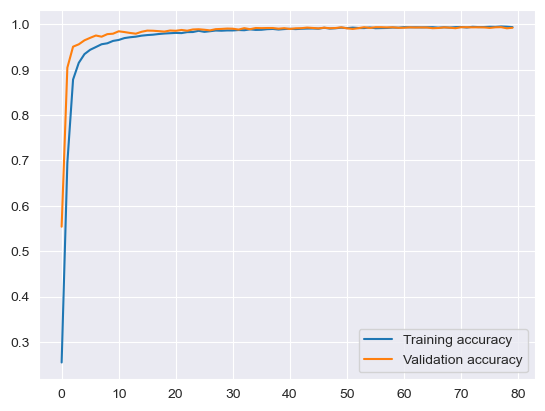

In [44]:
plot_model_performance('accuracy', 'val_accuracy')

In [49]:
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 56, 1)
print(mnist_test_arr.shape)

(10000, 28, 56, 1)


In [50]:
predictions = cnn_model.predict(mnist_test_arr)

313/313 [==============================] - 5s 16ms/step


In [51]:
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))

In [52]:
submission =  pd.DataFrame({
        "Index": mnist_test.index,
        "Class": predictions_test
    })

submission.to_csv('./my_submission.csv', index=False)

In [55]:
import pickle
filename = 'cnn.sav'
pickle.dump(cnn_model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://dea36058-acb8-4c93-9855-e99848376e91/assets


INFO:tensorflow:Assets written to: ram://dea36058-acb8-4c93-9855-e99848376e91/assets
